In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import cv2 
import os

In [38]:
image_s = 200

path1 = r"D:\Projects\Self\5. PCOD proj\data\train"
cate = ['infected','notinfected']

inp_image = []
for i in cate:
    folders = os.path.join(path1,i)
    labels = cate.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array,(image_s, image_s,))
        inp_image.append([image_array, labels])

In [39]:
len(inp_image)

1924

In [40]:
np.random.shuffle(inp_image)

In [41]:
X = []
Y = []

for X_values, labels in inp_image:
    X.append(X_values)
    Y.append(labels)


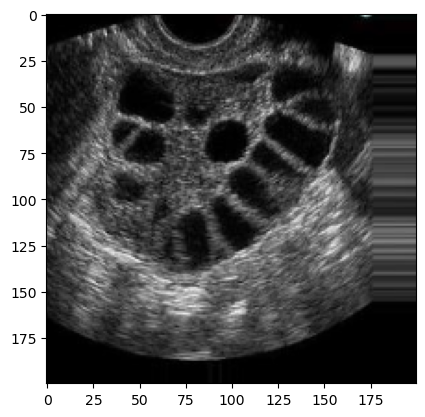

In [42]:
plt.imshow(X[40])

In [43]:
X = np.array(X)
Y = np.array(Y)

In [44]:
X = X/255

In [45]:
X.shape

(1924, 200, 200, 3)

In [46]:
Y.shape

(1924,)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [48]:
X_train.shape

(1539, 200, 200, 3)

In [49]:
 X_test.shape

(385, 200, 200, 3)

In [50]:
Y_train.shape

(1539,)

In [51]:
Y_train = to_categorical(Y_train)

In [52]:
Y_train.shape

(1539, 2)

In [53]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (3,3)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [54]:
adam = tf.keras.optimizers.Adam(learning_rate= 0.001)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [55]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64, validation_split = 0.1 )

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 704ms/step - accuracy: 0.7076 - loss: 1.5669 - val_accuracy: 0.9351 - val_loss: 0.1623
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step - accuracy: 0.9840 - loss: 0.0789 - val_accuracy: 0.9935 - val_loss: 0.0269
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 391ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - accuracy: 1.0000 - loss: 5.3295e-04 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 1.0000 - loss: 3.5913e-04 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - accuracy: 1.0000 - loss: 2.9826e-04 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 391ms/step - accuracy: 1.0000 - loss: 2.3837e-04 -

In [62]:
model.predict(X_train)

49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step


array([[9.99986649e-01, 1.33350213e-05],
       [2.83061212e-07, 9.99999762e-01],
       [3.03595662e-05, 9.99969602e-01],
       ...,
       [1.00000000e+00, 1.39894119e-09],
       [2.90188666e-07, 9.99999762e-01],
       [1.49904845e-05, 9.99984980e-01]], dtype=float32)

In [63]:
pred_prob = model.predict(X_test)
pred = pred_prob.argmax(axis = 1) # this gives max values

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [64]:
Y_test

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,

In [65]:
from sklearn.metrics import confusion_matrix

tab = confusion_matrix(Y_test, pred)

In [66]:
print('model_accuracy = ', tab.diagonal().sum()*100/tab.sum())

model_accuracy =  100.0


In [67]:
y_class = [np.argmax(element) for element in pred_prob]

In [68]:
# for 1st 5 instancees of Y
y_class[:5]

[0, 0, 1, 1, 1]

In [69]:
# prediction for that ist 5 instances
Y_test[:5]

array([0, 0, 1, 1, 1])

In [70]:
from sklearn.metrics import classification_report

print('Classification Report:', classification_report(Y_test, y_class))
confusion_matrix(Y_test, pred)

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       224

    accuracy                           1.00       385
   macro avg       1.00      1.00      1.00       385
weighted avg       1.00      1.00      1.00       385



array([[161,   0],
       [  0, 224]], dtype=int64)

In [71]:
## prediction: for a new dataset

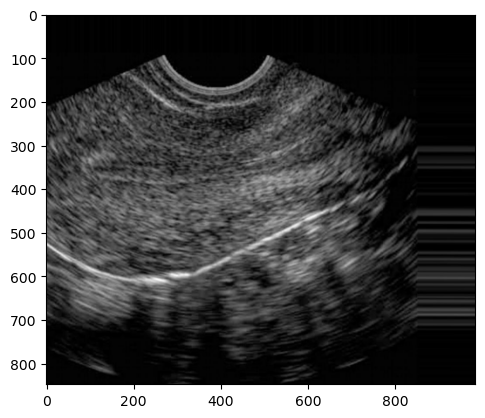

In [72]:
img1 = cv2.imread(r"D:\Projects\Self\5. PCOD proj\data\predict\img_0_0.jpg")
plt.imshow(img1)

In [73]:
img_resized = cv2.resize(img1, (200, 200))

# Add batch dimension (make it (1, 200, 200, 3))
img_resized = np.expand_dims(img_resized, axis=0)

In [74]:
img1.shape

(848, 984, 3)

In [75]:
pred_prob = model.predict(img_resized)
pred = pred_prob.argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [76]:
y = [np.argmax(element) for element in pred_prob]
y

[1]

In [ ]:
# For the whole dataset of 104 images

In [98]:
# Initialize an empty list to store image paths
folder_path = r"D:\Projects\Self\5. PCOD proj\data\predict"
valid_extensions = ("jpg", "jpeg", "png", "gif")
image_s = 200
image_paths = []
inp = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
# Check if the file has a valid image extension

    if filename.lower().endswith(valid_extensions):
    # Add the full path of the image to the list
        full_path = os.path.join(folder_path, filename)
        image_paths.append(full_path) # for image path
        image_array = cv2.imread(full_path)
        image_array = cv2.resize(image_array,(image_s, image_s,)) #reading the images in the path
        inp.append(image_array)


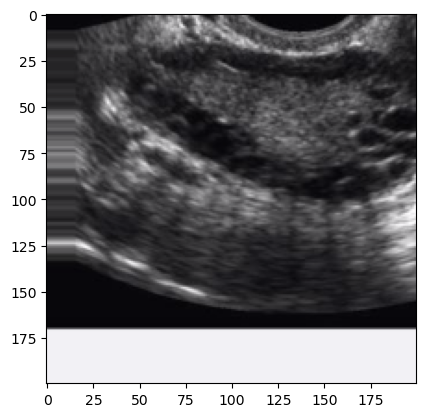

In [78]:
plt.imshow(inp[20])

In [79]:
inp[17].shape

(200, 200, 3)

In [80]:
# adding batch dimension
inp_img = []
for i in inp:
     image = np.expand_dims(i, axis=0)
     inp_img.append(image)

In [81]:
## Storing all imagses in a array: this is done for image to run in a single array
inp_img = np.concatenate(inp_img, axis=0)
print(inp_img.shape)

(104, 200, 200, 3)


In [82]:
inp_img[60].shape

(200, 200, 3)

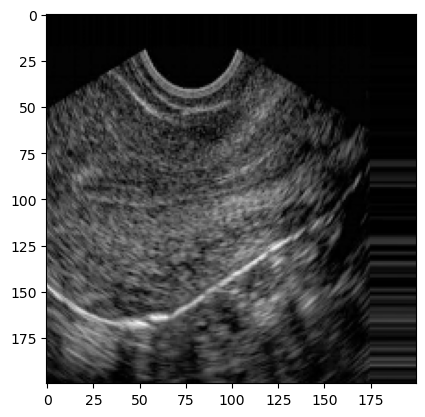

In [88]:
plt.imshow(inp_img[103])

In [89]:
pred_prob1 = model.predict(inp_img)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [90]:
predict = pred_prob1.argmax(axis = 1)

In [91]:
predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [93]:
## These are the predicted values for the dataset with no labels

In [ ]:
## Here 1 --> 

In [113]:
import pandas as pd

# Define columns for the DataFrame
columns = ['Image_Path', 'Prediction']

# Create an empty DataFrame with these columns
df = pd.DataFrame(columns=columns)

df['Image_Path'] = image_paths
df['Prediction'] = predict


In [114]:
df.head()

,Image_Path,Prediction
0,D:\Projects\Self\5. PCOD proj\data\predict\img...,1
1,D:\Projects\Self\5. PCOD proj\data\predict\img...,1
2,D:\Projects\Self\5. PCOD proj\data\predict\img...,1
3,D:\Projects\Self\5. PCOD proj\data\predict\img...,1
4,D:\Projects\Self\5. PCOD proj\data\predict\img...,1


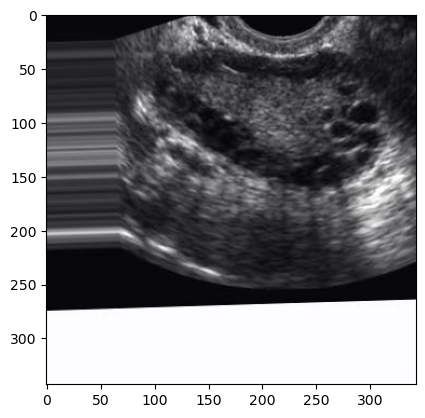

In [134]:
img1 = cv2.imread(df['Image_Path'][78])
plt.imshow(img1)

In [135]:
df['Prediction'][78]

0

Here :
- 1---> no PCOS ---> no cysts in the ovary
- 0---> PCOS ------> there are cysts in the ovary